# Imports

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
df = pd.read_csv('Ecommerce Customers.csv')

# Dataset Information

In [42]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [44]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# EDA

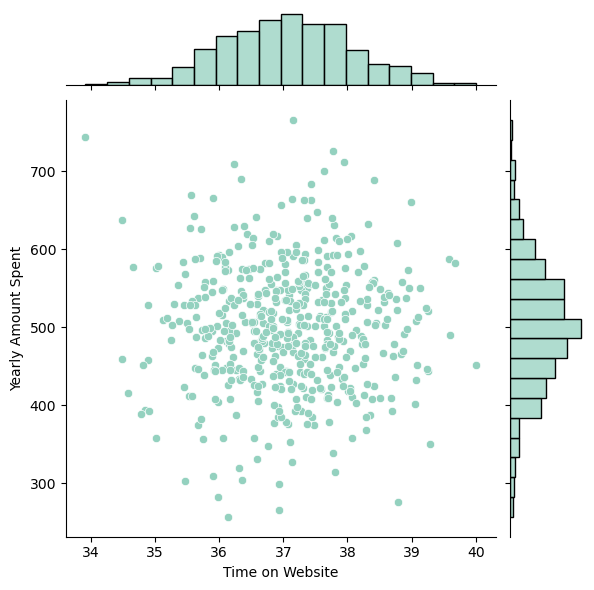

In [45]:
sns.set_palette("GnBu_d")
sns.jointplot(df,x=df['Time on Website'],y=df['Yearly Amount Spent'])

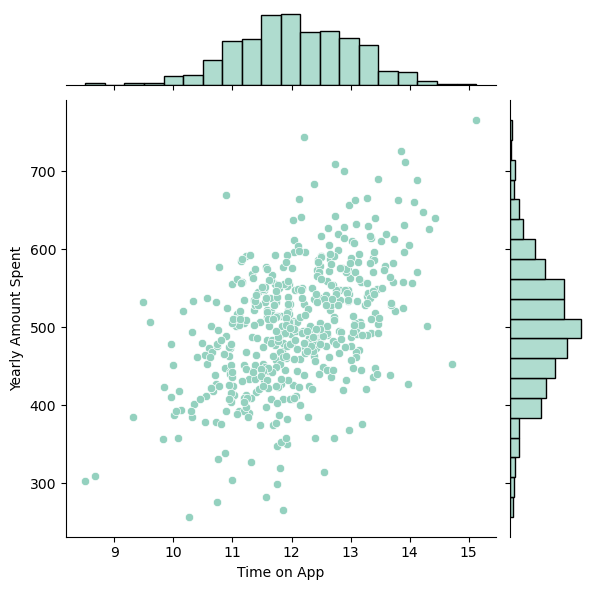

In [46]:
sns.set_palette("GnBu_d")
sns.jointplot(df,x=df['Time on App'],y=df['Yearly Amount Spent'])

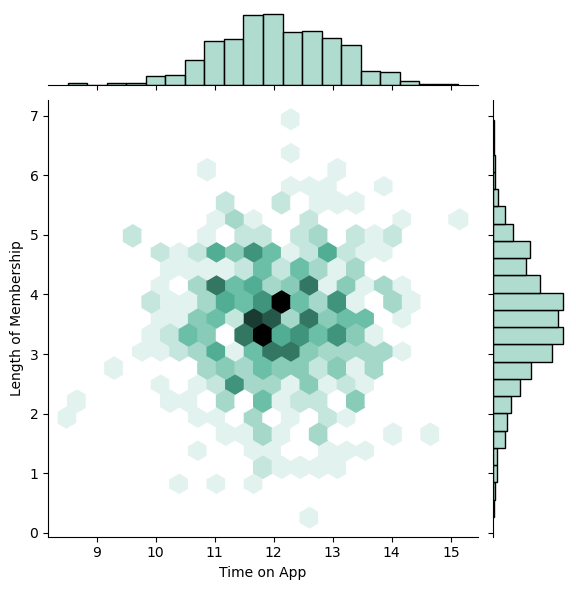

In [47]:
sns.jointplot(df,x=df['Time on App'],y=df['Length of Membership'],kind='hex')

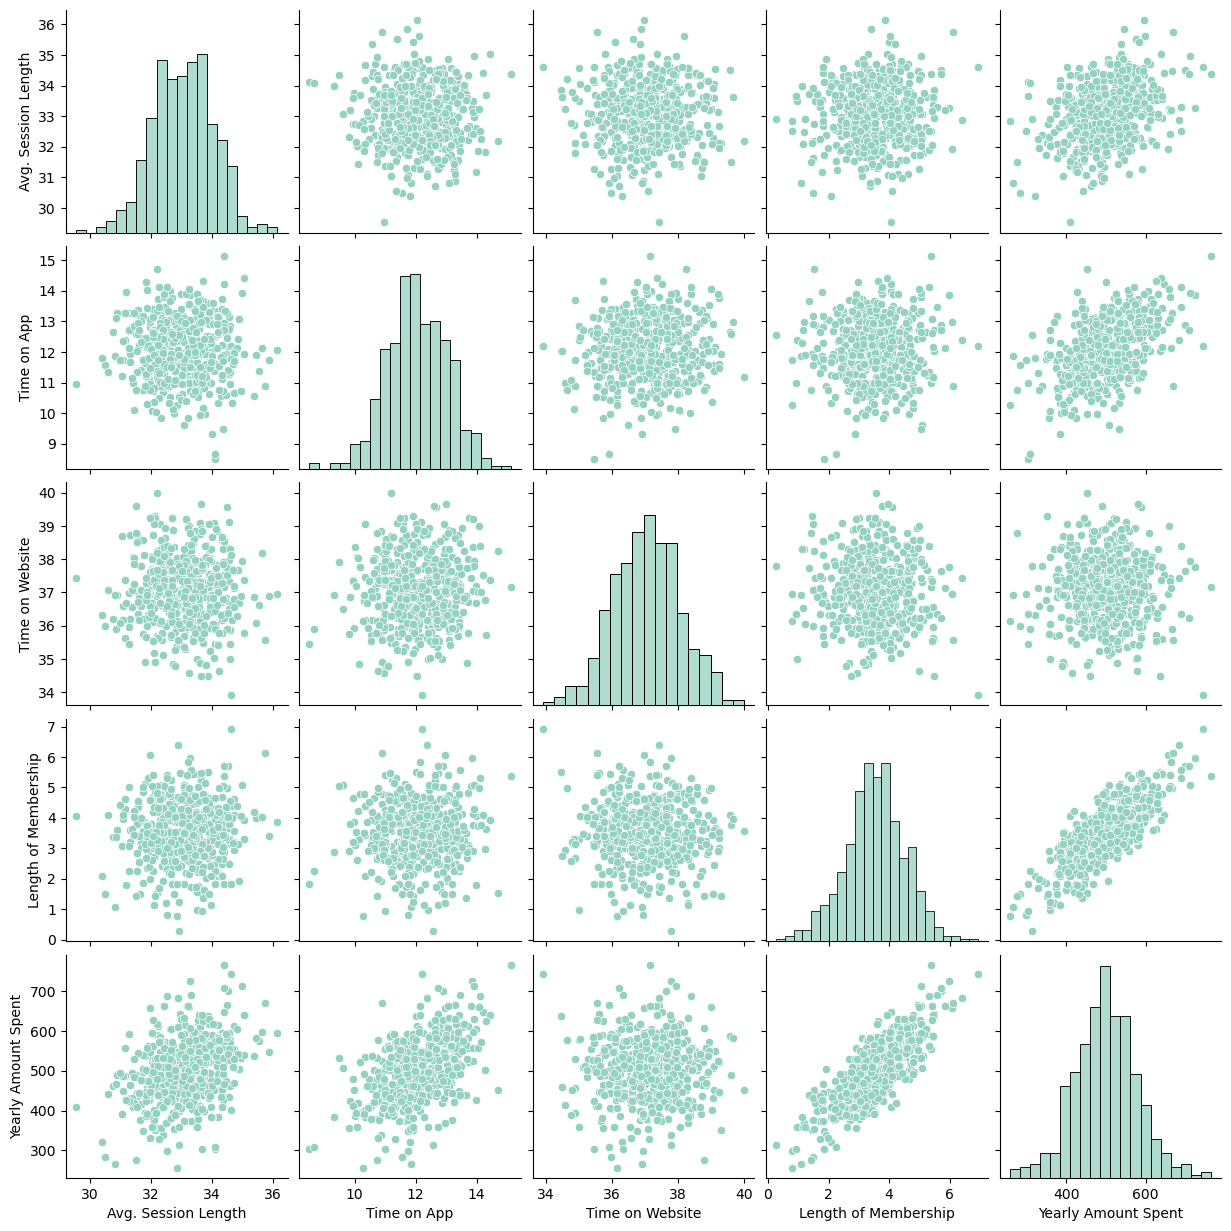

In [48]:
sns.pairplot(df)

In [49]:
#The majority of our features exhibit a normal distribution, and our target variable shows a correlation of 0.8 exclusively with the length of membership column.
df['Yearly Amount Spent'].corr(df['Length of Membership'])

0.8090835682475813

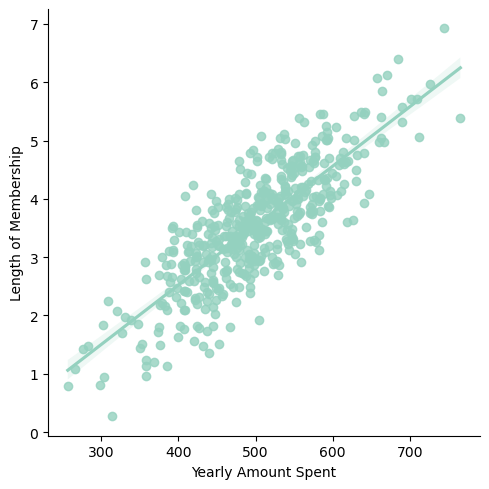

In [50]:
sns.lmplot(df,x='Yearly Amount Spent', y='Length of Membership',palette='GnBu_d')

In [51]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

# Split Train/Test Data

In [52]:
X = df[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

# Model Training

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
lm = LinearRegression()

In [57]:
lm.fit(X_train,y_train)

LinearRegression()

In [58]:
print('coefficients of the model: \n', lm.coef_)

coefficients of the model: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


In [59]:
print(lm.intercept_)

-1047.932782250239


In [60]:
pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [61]:
predictions = lm.predict(X_test)

** Create a scatterplot of the real test values versus the predicted values. **

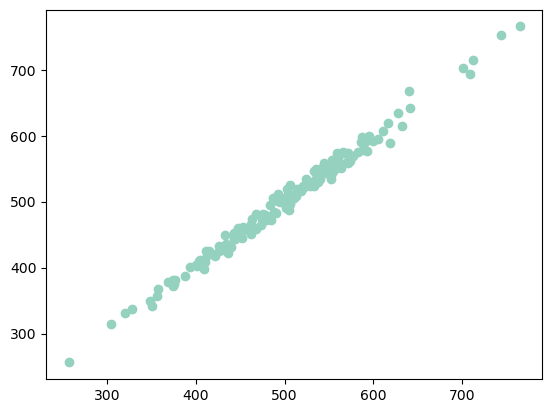

In [62]:
plt.scatter(y_test,predictions)

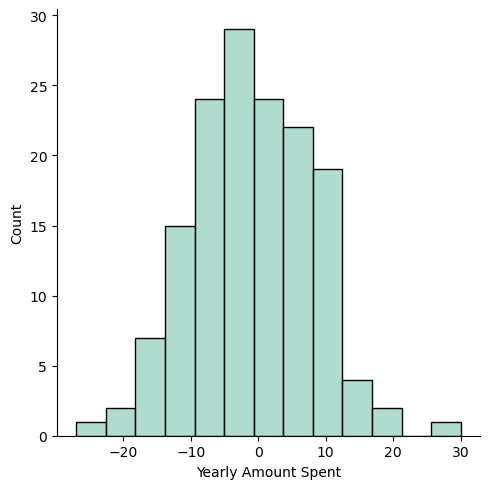

In [63]:
sns.displot((y_test-predictions))

# Model Evaluation

In [64]:
from sklearn import metrics

In [65]:
metrics.mean_absolute_error(y_test,predictions)

7.2281486534308295

In [66]:
metrics.mean_squared_error(y_test,predictions)

79.81305165097442

In [67]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

8.933815066978632

In [71]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.9890046246741234

In [68]:
import numpy as np
from sklearn.metrics import mean_squared_error

model_mse = mean_squared_error(y_test, predictions)

baseline_prediction = np.mean(y_test)
baseline_predictions = np.full_like(y_test, baseline_prediction)
baseline_mse = mean_squared_error(y_test, baseline_predictions)

# Print the results
print("Model MSE:", model_mse)
print("Baseline MSE (predicting the mean):", baseline_mse)

# Compare the model's MSE to the baseline MSE
if model_mse < baseline_mse:
    print("The model is providing meaningful improvements.")
else:
    print("Consider evaluating or refining your model as its performance is not significantly better than the baseline.")

Model MSE: 79.81305165097442
Baseline MSE (predicting the mean): 7258.78374184662
The model is providing meaningful improvements.


# Save Model

In [69]:
import pickle 
pickle.dump(df,open('movie_list.pkl','wb'))